# Gambler:
    # The Gambler example
    Coin toss and gambler

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# goal
GOAL = 100
# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)
# probability of head
HEAD_PROB = 0.4


In [10]:
def run_policy():
    # state value
    state_value = np.zeros(GOAL + 1)
    state_value[GOAL] = 1.0
    sweeps_history = []
    # value iteration
    while True:
        old_state_value = state_value.copy()
        sweeps_history.append(old_state_value)
        for state in STATES[1:GOAL]:
            # get possilbe actions for current state
            actions = np.arange(min(state, GOAL - state) + 1)
            action_returns = []
            for action in actions:
                action_returns.append(HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB))
            new_value = np.max(action_returns)
            state_value[state] = new_value
        delta = abs(state_value - old_state_value).max()
        if delta < 1e-9:
            sweeps_history.append(state_value)
            break
                    
    # compute the optimal policy
    policy = np.zeros(GOAL + 1)
    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB))

        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5))]
                                
    plt.figure(figsize=(10, 20))
    plt.subplot(2, 1, 1)
    for sweep, state_value in enumerate(sweeps_history):
        plt.plot(state_value, label='sweep {}'.format(sweep))
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')
                                
    plt.subplot(2, 1, 2)
    plt.scatter(STATES, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()
    # plt.close()

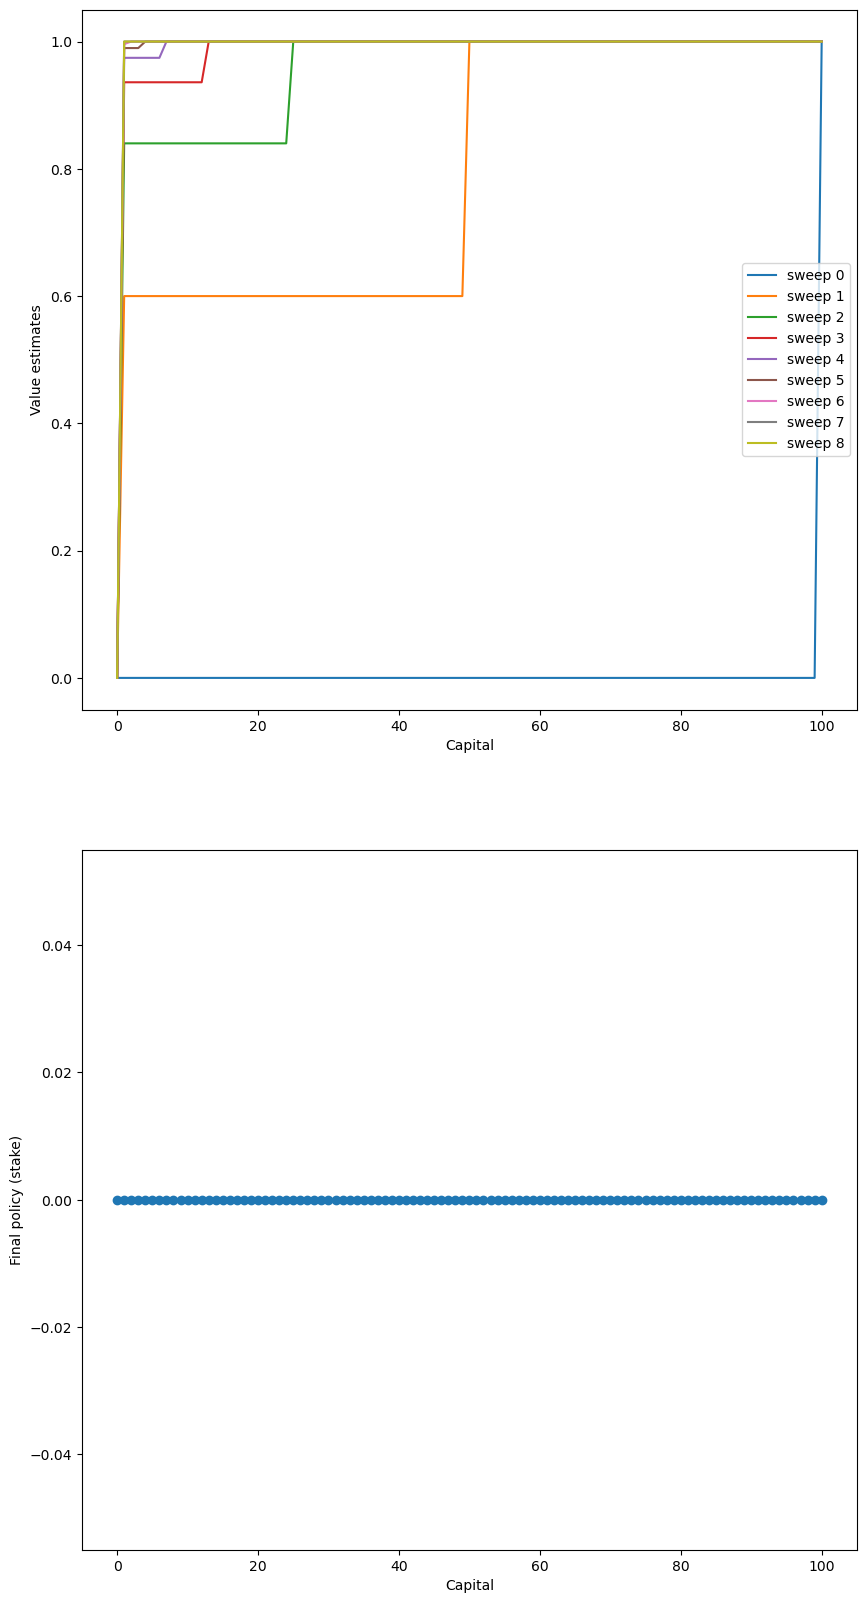

In [11]:
run_policy()